# **CWC 2023**

### *Data From CWC (https://www.cricketworldcup.com/fixtures) Site*

![CWC_2023](https://www.sacricketmag.com/wp-content/uploads/2023/09/Pakistan-2023-CWC.jpg)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("CWC_2023.xlsx")
df.head()

,Match#,Teams,Date,Venue,Result,Time,Day of the Week,Month,Day of the Month
0,Match#1,"('England', 'New Zealand')",Thu 05 October (LOCAL),"Narendra Modi Stadium, Ahmedabad",New Zealandby9wickets,14:00:00,Thursday,October,5
1,Match#2,"('Pakistan', 'Netherlands')",Fri 06 October (LOCAL),"Rajiv Gandhi International Stadium, Hyderabad",Pakistanby81runs,14:00:00,Friday,October,6
2,Match#3,"('Bangladesh', 'Afghanistan')",Sat 07 October (LOCAL),"HPCA Stadium, Dharamsala",Bangladeshby6wickets,10:30:00,Saturday,October,7
3,Match#4,"('South Africa', 'Sri Lanka')",Sat 07 October (LOCAL),"Arun Jaitley Stadium, Delhi",South Africaby102runs,14:00:00,Saturday,October,7
4,Match#5,"('India', 'Australia')",Sun 08 October (LOCAL),"MA Chidambaram Stadium, Chennai",Indiaby6wickets,14:00:00,Sunday,October,8


In [3]:
### Just changing the position of columns
columns = list(df.columns)
columns.insert(3, columns.pop(columns.index('Time')))
df = df[columns]

columns = list(df.columns)
columns.insert(4, columns.pop(columns.index('Day of the Week')))
df = df[columns]

columns = list(df.columns)
columns.insert(5, columns.pop(columns.index('Teams')))
df = df[columns]

columns = list(df.columns)
columns.insert(4, columns.pop(columns.index('Month')))
df = df[columns]

columns = list(df.columns)
columns.insert(4, columns.pop(columns.index('Day of the Month')))
df = df[columns]

df.head()

,Match#,Date,Time,Day of the Week,Day of the Month,Month,Venue,Teams,Result
0,Match#1,Thu 05 October (LOCAL),14:00:00,Thursday,5,October,"Narendra Modi Stadium, Ahmedabad","('England', 'New Zealand')",New Zealandby9wickets
1,Match#2,Fri 06 October (LOCAL),14:00:00,Friday,6,October,"Rajiv Gandhi International Stadium, Hyderabad","('Pakistan', 'Netherlands')",Pakistanby81runs
2,Match#3,Sat 07 October (LOCAL),10:30:00,Saturday,7,October,"HPCA Stadium, Dharamsala","('Bangladesh', 'Afghanistan')",Bangladeshby6wickets
3,Match#4,Sat 07 October (LOCAL),14:00:00,Saturday,7,October,"Arun Jaitley Stadium, Delhi","('South Africa', 'Sri Lanka')",South Africaby102runs
4,Match#5,Sun 08 October (LOCAL),14:00:00,Sunday,8,October,"MA Chidambaram Stadium, Chennai","('India', 'Australia')",Indiaby6wickets


In [4]:
df.shape

(48, 9)

In [5]:
df.columns

Index(['Match#', 'Date', 'Time', 'Day of the Week', 'Day of the Month',
       'Month', 'Venue', 'Teams', 'Result'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Match#              0
Date                0
Time                0
Day of the Week     0
Day of the Month    0
Month               0
Venue               0
Teams               0
Result              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match#            48 non-null     object
 1   Date              48 non-null     object
 2   Time              48 non-null     object
 3   Day of the Week   48 non-null     object
 4   Day of the Month  48 non-null     int64 
 5   Month             48 non-null     object
 6   Venue             48 non-null     object
 7   Teams             48 non-null     object
 8   Result            48 non-null     object
dtypes: int64(1), object(8)
memory usage: 3.5+ KB


In [9]:
df.nunique()

Match#              48
Date                42
Time                 2
Day of the Week      7
Day of the Month    31
Month                2
Venue               10
Teams               46
Result              45
dtype: int64

In [10]:
features = ['Time', 'Venue', 'Day of the Week', 'Month']

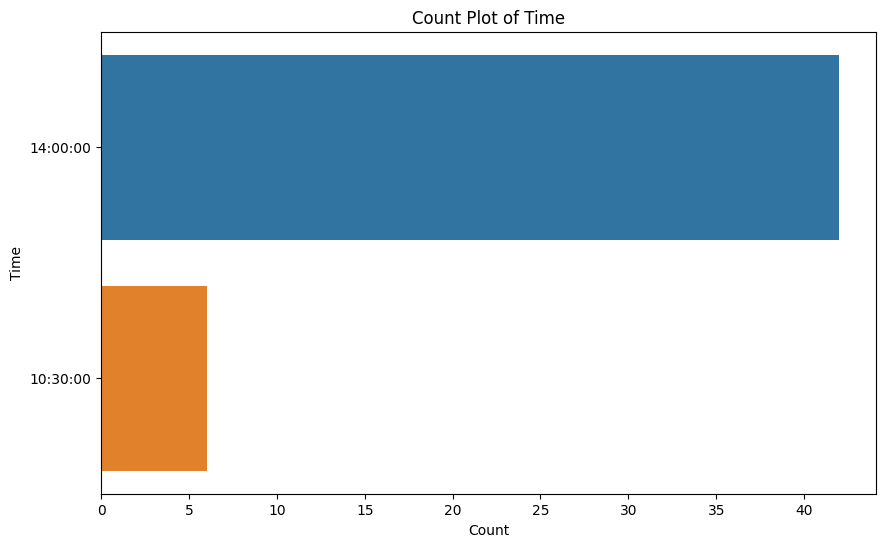

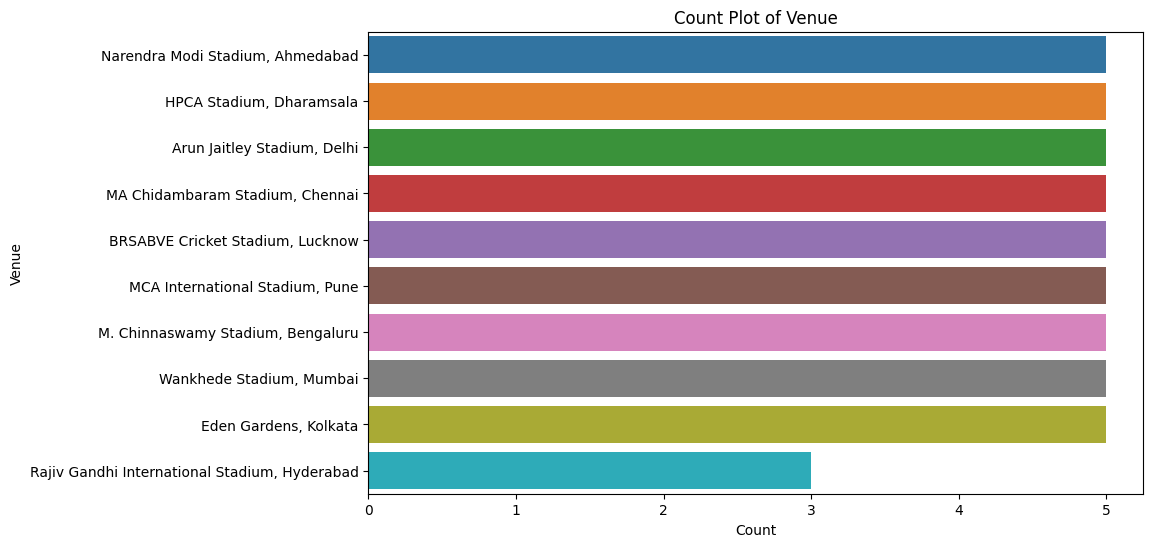

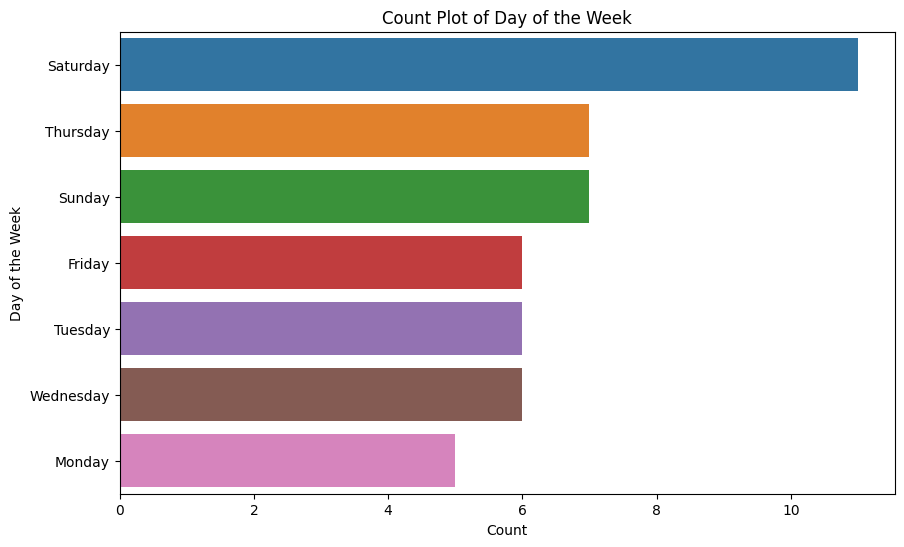

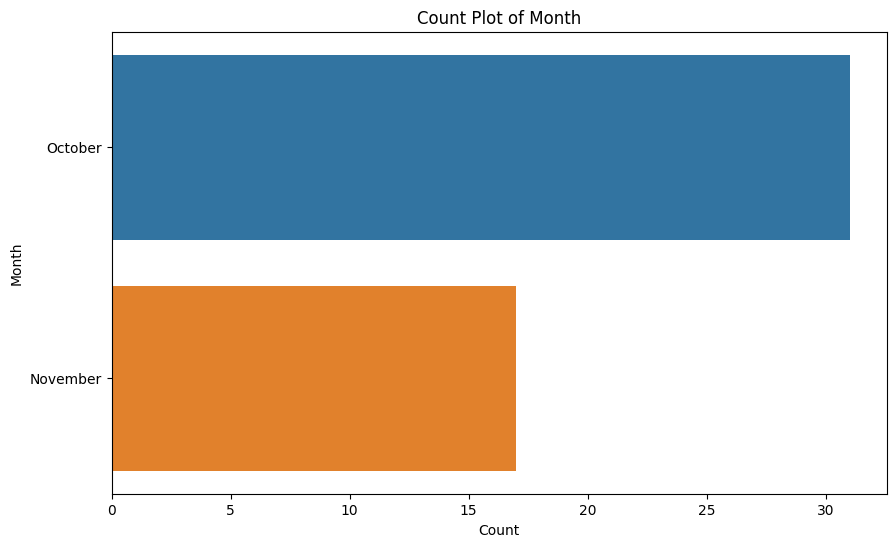

In [11]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

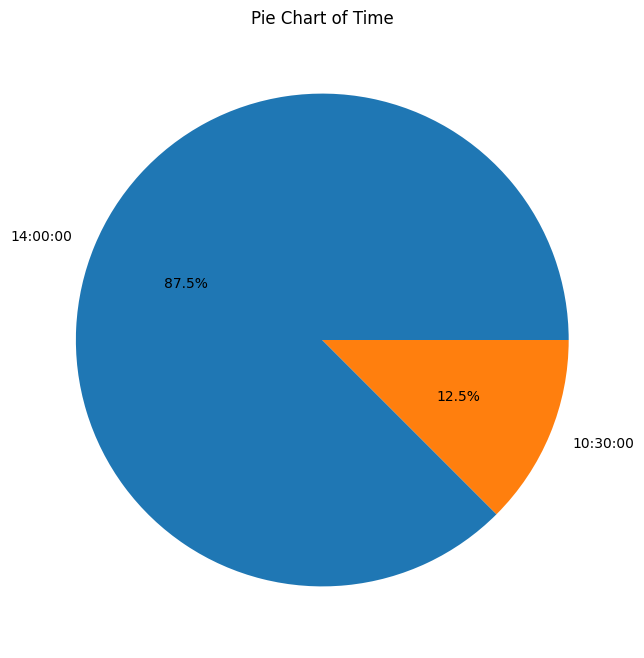

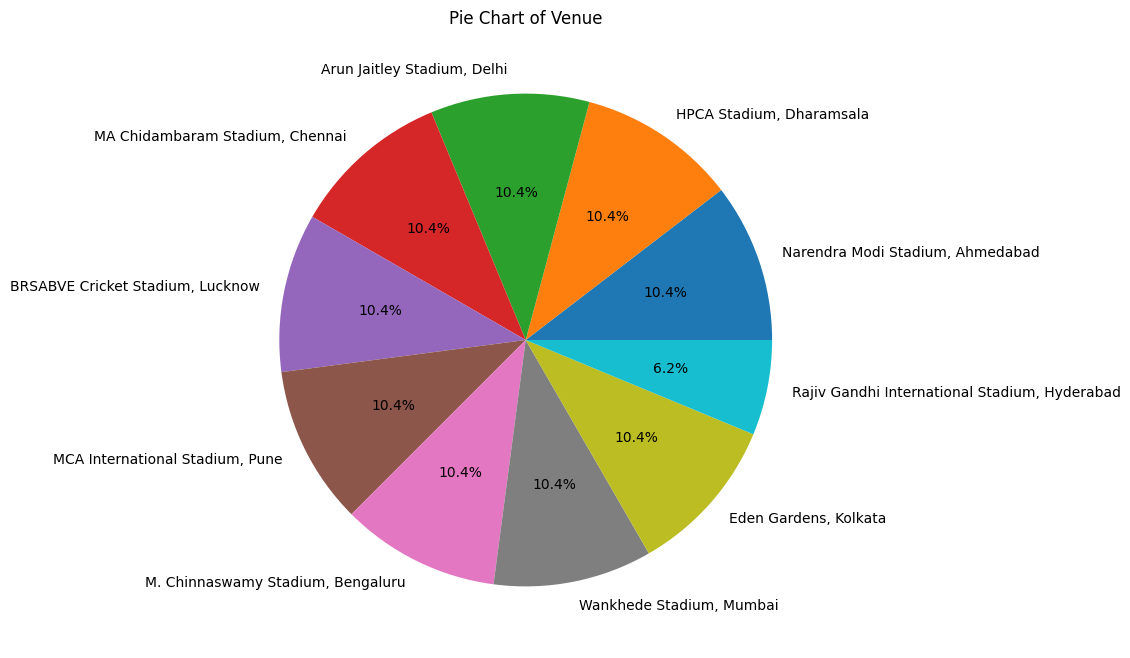

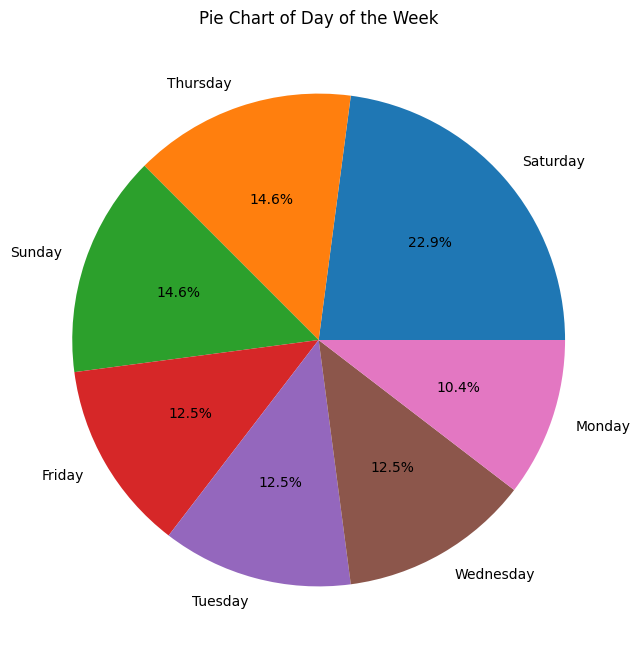

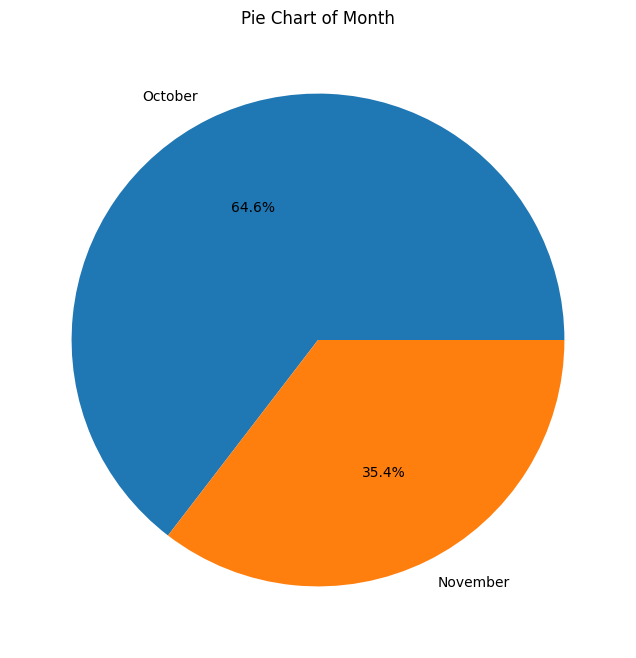

In [12]:
for feature in features:
    plt.figure(figsize=(8, 8))
    plt.title(f'Pie Chart of {feature}')
    df[feature].value_counts().plot.pie(autopct='%1.1f%%')
    plt.ylabel('')  
    plt.show()

In [13]:
for feature in features:
    count_fig = px.bar(df, x=df[feature].value_counts().index, y=df[feature].value_counts().values,
                       title=f'Count Plot of {feature}')
    count_fig.update_xaxes(title_text='Count')
    count_fig.update_yaxes(title_text=feature)
    count_fig.show()

In [14]:
for feature in features:
    pie_fig = px.pie(df, names=df[feature].value_counts().index, values=df[feature].value_counts().values,
                     title=f'Pie Chart of {feature}')
    pie_fig.update_traces(textposition='inside', textinfo='percent+label')
    pie_fig.show()

In [15]:
numerical_columns = ['Day of the Month']

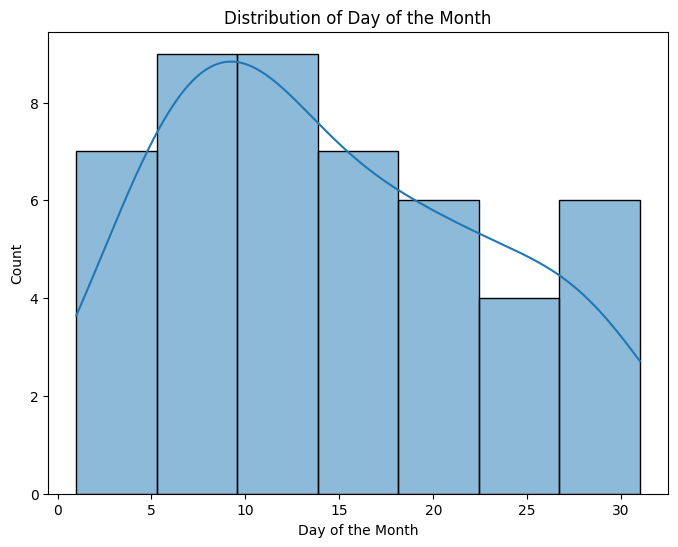

In [16]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

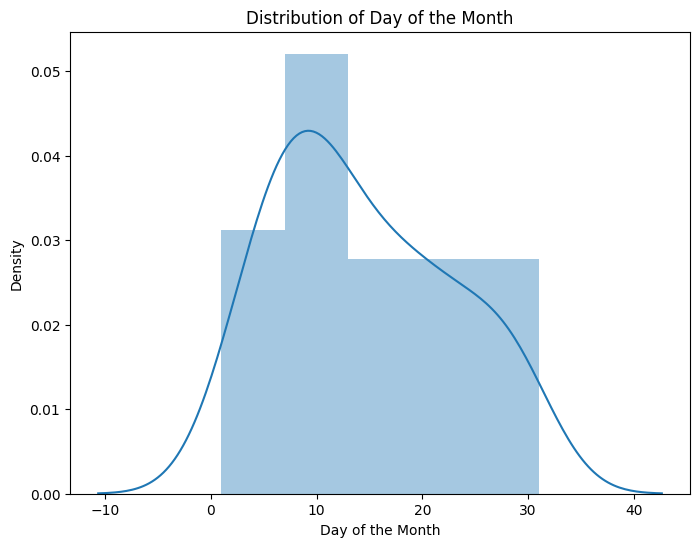

In [17]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

In [18]:
for column in numerical_columns:
    fig = px.histogram(df, x=column, nbins=50, labels={column: f'Distribution of {column}'}, title=f'Distribution of {column}')
    fig.update_layout(xaxis_title=column, yaxis_title='Count')
    fig.show()

In [19]:
cross_tab = pd.crosstab(df['Month'], df['Day of the Week'])
cross_tab

Day of the Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
November,2,1,4,3,3,1,3
October,4,4,7,4,4,5,3


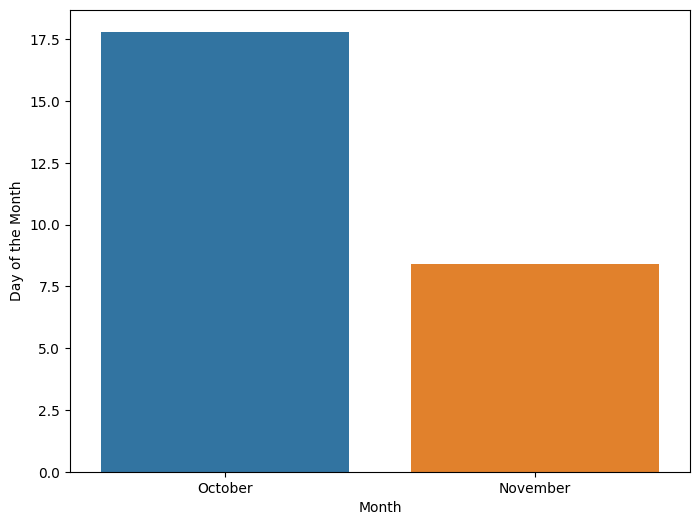

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Day of the Month', ci = None, data=df)
plt.show()

In [21]:
fig = px.bar(df, x='Month', y='Day of the Month')
fig.update_layout(title='Bar Plot of Day of the Month by Month')
fig.show()

In [22]:
fig = px.box(df, x='Month', y='Day of the Month')
fig.update_layout(title='Box Plot of Day of the Month by Month')
fig.show()

In [23]:
fig = px.violin(df, x='Month', y='Day of the Month')
fig.update_layout(title='Violin Plot of Day of the Month by Month')
fig.show()

<Figure size 1600x900 with 0 Axes>

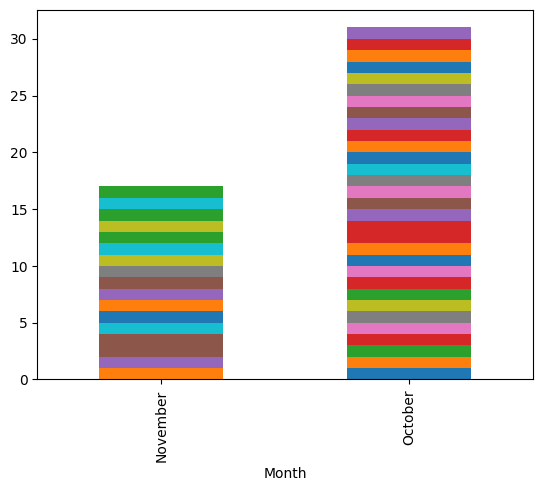

In [24]:
cross_tab = pd.crosstab(df['Month'], df['Result'])
plt.figure(figsize=(16, 9))
cross_tab.plot(kind='bar', stacked=True, legend=False)
plt.show()

In [25]:
cross_tab_long = cross_tab.stack().reset_index(name='Count')

fig = px.bar(cross_tab_long, x='Month', y='Count', color='Result', title='Stacked Bar Plot of Status by Month')
fig.show()

In [26]:
cross_tab

Result,Afghanistanby69runs,Afghanistanby7wickets,Afghanistanby8wickets,Australiaby309runs,Australiaby33runs,Australiaby3wickets,Australiaby5runs,Australiaby5wickets,Australiaby62runs,Australiaby6wickets,...,Pakistanby81runs,South Africaby102runs,South Africaby134runs,South Africaby149runs,South Africaby190runs,South Africaby1wicket,South Africaby229runs,South Africaby5wickets,Sri Lankaby5wickets,Sri Lankaby8wickets
Month,,,,,,,,,,,,,,,,,,,,,
November,0,1,0,0,1,2,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
October,1,1,1,1,0,0,1,1,1,0,...,1,1,1,1,0,1,1,0,1,1


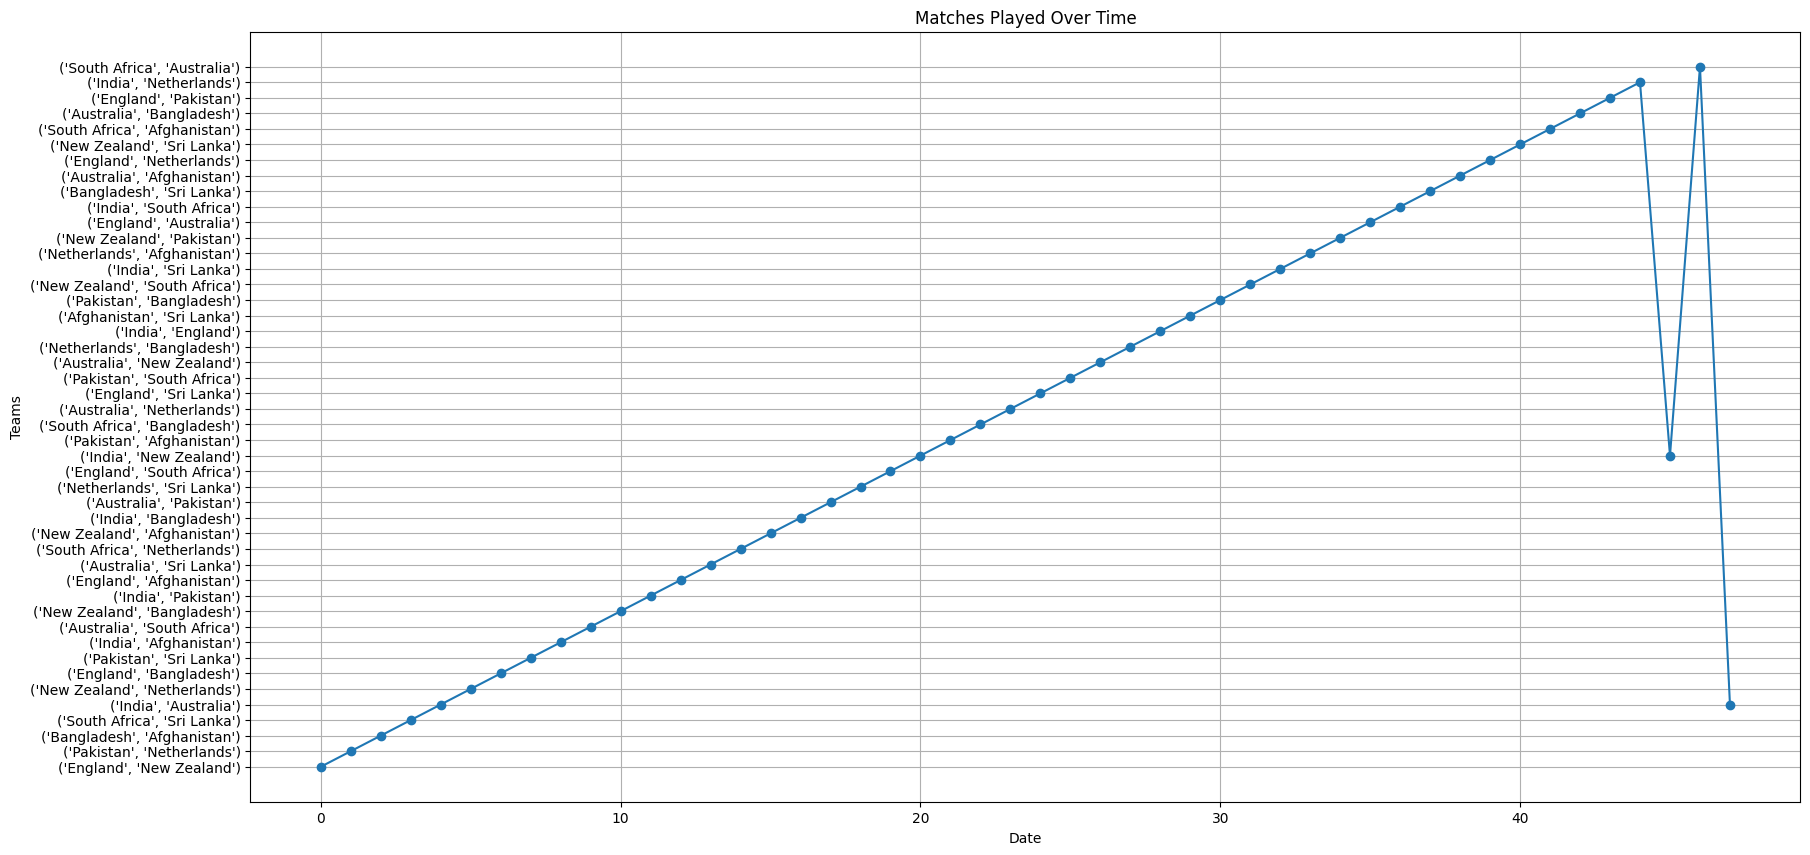

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Teams'], marker='o', linestyle='-')
plt.title('Matches Played Over Time')
plt.xlabel('Date')
plt.ylabel('Teams')
plt.grid(True)
plt.show()

In [28]:
df['Teams'] = df['Teams'].str.replace(r"[(),'']", '')
df['Winning Team'] = df['Teams'].str.split().str[0]

In [29]:
df['Winning Team'] = df['Winning Team'].str.replace(' Won', '')
df

,Match#,Date,Time,Day of the Week,Day of the Month,Month,Venue,Teams,Result,Winning Team
0,Match#1,Thu 05 October (LOCAL),14:00:00,Thursday,5,October,"Narendra Modi Stadium, Ahmedabad","('England', 'New Zealand')",New Zealandby9wickets,"('England',"
1,Match#2,Fri 06 October (LOCAL),14:00:00,Friday,6,October,"Rajiv Gandhi International Stadium, Hyderabad","('Pakistan', 'Netherlands')",Pakistanby81runs,"('Pakistan',"
2,Match#3,Sat 07 October (LOCAL),10:30:00,Saturday,7,October,"HPCA Stadium, Dharamsala","('Bangladesh', 'Afghanistan')",Bangladeshby6wickets,"('Bangladesh',"
3,Match#4,Sat 07 October (LOCAL),14:00:00,Saturday,7,October,"Arun Jaitley Stadium, Delhi","('South Africa', 'Sri Lanka')",South Africaby102runs,('South
4,Match#5,Sun 08 October (LOCAL),14:00:00,Sunday,8,October,"MA Chidambaram Stadium, Chennai","('India', 'Australia')",Indiaby6wickets,"('India',"
5,Match#6,Mon 09 October (LOCAL),14:00:00,Monday,9,October,"Rajiv Gandhi International Stadium, Hyderabad","('New Zealand', 'Netherlands')",New Zealandby99runs,('New
6,Match#7,Tue 10 October (LOCAL),10:30:00,Tuesday,10,October,"HPCA Stadium, Dharamsala","('England', 'Bangladesh')",Englandby137runs,"('England',"
7,Match#8,Tue 10 October (LOCAL),14:00:00,Tuesday,10,October,"Rajiv Gandhi International Stadium, Hyderabad","('Pakistan', 'Sri Lanka')",Pakistanby6wickets,"('Pakistan',"
8,Match#9,Wed 11 October (LOCAL),14:00:00,Wednesday,11,October,"Arun Jaitley Stadium, Delhi","('India', 'Afghanistan')",Indiaby8wickets,"('India',"
9,Match#10,Thu 12 October (LOCAL),14:00:00,Thursday,12,October,"BRSABVE Cricket Stadium, Lucknow","('Australia', 'South Africa')",South Africaby134runs,"('Australia',"


In [30]:
winning_counts = df['Winning Team'].value_counts()
winning_counts

Winning Team
('India',          11
('England',         8
('Australia',       7
('New               6
('Pakistan',        5
('South             5
('Netherlands',     3
('Bangladesh',      2
('Afghanistan',     1
Name: count, dtype: int64

In [31]:
matches_played = df['Teams'].str.split(' , ', expand=True)
matches_played

,0
0,"('England', 'New Zealand')"
1,"('Pakistan', 'Netherlands')"
2,"('Bangladesh', 'Afghanistan')"
3,"('South Africa', 'Sri Lanka')"
4,"('India', 'Australia')"
5,"('New Zealand', 'Netherlands')"
6,"('England', 'Bangladesh')"
7,"('Pakistan', 'Sri Lanka')"
8,"('India', 'Afghanistan')"
9,"('Australia', 'South Africa')"


In [32]:
df.to_csv("CWC-2023.csv")